# 1 - Perkenalan

Nama : Nurul Izzah

Dataset : Lion Parcel loan dataset

Objective : project kali ini bertujuan untuk mengetahui karakteristik dari customer yg loan nya diterima dan yang tidak diterima

# 2 - Import Libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from feature_engine.outliers import Winsorizer

# 3 - Data Loading

In [ ]:
#import data from github
train = pd.read_csv ('https://raw.githubusercontent.com/ardhiraka/talent_fair_sample_challenge/main/datasets/lion-loan-train.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#import data from github
test = pd.read_csv ('https://raw.githubusercontent.com/ardhiraka/talent_fair_sample_challenge/main/datasets/lion-loan-test.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
# duplikat data agar tidak kehilangan data awal
train_copy = train.copy()
test_copy = test.copy()

In [ ]:
# melihat tipe data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


data train memiliki total 13 kolom diantaranya 8 bertipe data object, 1 bertipe interger dan 4 yg bertipe data float. terdapat mising value di beberapa kolom antara lain Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, dan Credit_History.

In [ ]:
# melihat tipe data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


data test memiliki total 12 kolom diantaranya 8 bertipe data object, 2 bertipe data int dan 3 bertipe data float.  terdapat mising value di beberapa kolom antara lain kolom Gender, Slef_Emloyed, LoanAmount, Loan_Amount_Term, dan Credit_History.

In [ ]:
# melihat 10 data train teratas
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# melihat 10 data train terbawah
train.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
# melihat 10 data test teratas
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [ ]:
# melihat 10 data test terbawah
train.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
#deskriptif analis data train
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- Rata-rata pendapatan pengaju pinjaman adalah sekitar 5403.46. Pendapatan terendah adalah 150, sementara pendapatan tertinggi adalah 81000

- Rata-rata pendapatan penjamin pinjaman adalah sekitar 1621.25. Pendapatan penjamin terendah adalah 0, yang berarti ada beberapa pengaju yang tidak memiliki penjamin. Pendapatan penjamin tertinggi adalah 41667

- Rata-rata jumlah pinjaman yang diminta adalah sekitar 146.41. Jumlah pinjaman terendah adalah 9, sementara jumlah pinjaman tertinggi adalah 700.

- Rata-rata jangka waktu pinjaman adalah 342 bulan. Jangka waktu pinjaman terendah adalah 12 bulan, sementara jangka waktu pinjaman tertinggi adalah 480 bulan.

- Mayoritas pengaju pinjaman (sekitar 84%) memiliki riwayat kredit yang baik (1), sedangkan sisanya memiliki riwayat kredit yang buruk atau tidak memiliki riwayat kredit sama sekali (0).

In [ ]:
#deskriptif analis data test
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


- Rata-rata pendapatan pengaju pinjaman adalah sekitar 4805.60. Pendapatan terendah adalah 0, yang berarti ada beberapa pengaju yang tidak memiliki pendapatan. Pendapatan tertinggi adalah 72529.

- Rata-rata pendapatan penjamin pinjaman adalah sekitar 1569.58. Pendapatan penjamin terendah adalah 0, yang berarti ada beberapa pengaju yang tidak memiliki penjamin. Pendapatan penjamin tertinggi adalah 24000.

- Rata-rata jumlah pinjaman yang diminta adalah sekitar 136.13. Jumlah pinjaman terendah adalah 28, sementara jumlah pinjaman tertinggi adalah 550.

- Rata-rata jangka waktu pinjaman adalah 342.54 bulan. Jangka waktu pinjaman terendah adalah 6 bulan, sementara jangka waktu pinjaman tertinggi adalah 480 bulan.

- Mayoritas pengaju pinjaman (sekitar 82%) memiliki riwayat kredit yang baik (1), sedangkan sisanya memiliki riwayat kredit yang buruk atau tidak memiliki riwayat kredit sama sekali (0).

# 4 - EDA

> mengetahui distribusi data berdasarkan pelanggan

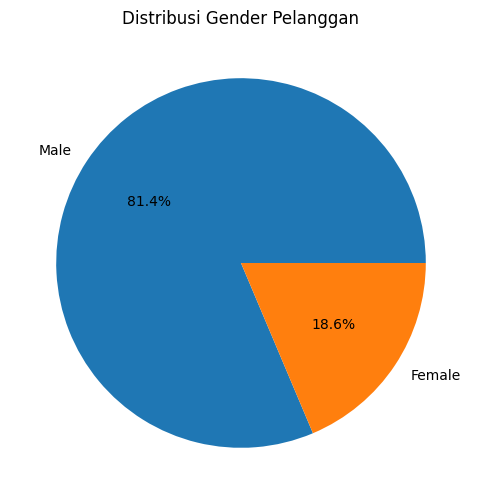

In [ ]:
# Eksplorasi distribusi gender pelanggan
gender_counts = train['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Gender Pelanggan')
plt.show()

Berdasarkan visualisasi tersebut, dapat disimpulkan bahwa rata2 pemohon lebih banyak berjenis kelamin pria dari pada wanita

> melihat perbandingan antara segmen gender

In [ ]:
# Perbandingan statistik deskriptif antara segmen gender
gender_stats = train.groupby('Gender')['ApplicantIncome'].describe()
print('Statistik Pendapatan Pemohon berdasarkan Gender:')
print(gender_stats)

Statistik Pendapatan Pemohon berdasarkan Gender:
        count         mean          std    min     25%     50%     75%  \
Gender                                                                   
Female  112.0  4643.473214  3585.381488  210.0  2661.5  3583.0  4606.5   
Male    489.0  5446.460123  6185.789262  150.0  2917.0  3865.0  5923.0   

            max  
Gender           
Female  19484.0  
Male    81000.0  


berdasarkan statistik deskriptif dapat disimpulkan bahwa pemohon pria memiliki rata2 pendapatan yg sedkit lebih tinggi dari pada pemohon wanita

> melihat distribusi pelanggan berdasarkan Property_Area

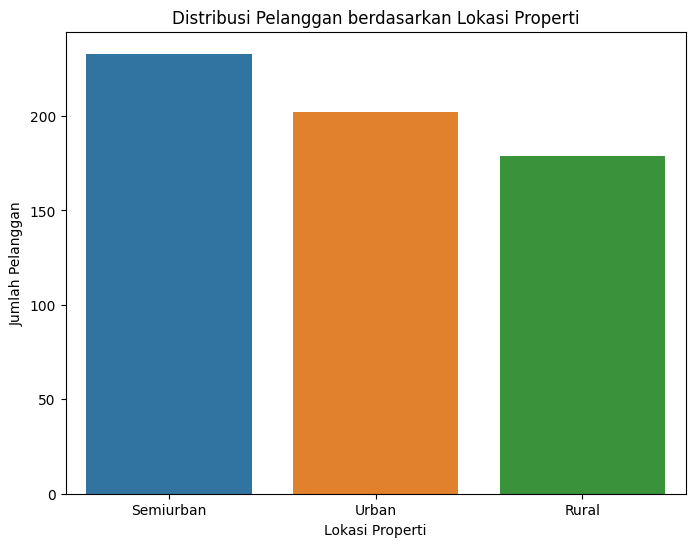

In [ ]:
# Analisis distribusi pelanggan berdasarkan Property_Area
property_counts = train['Property_Area'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=property_counts.index, y=property_counts.values)
plt.title('Distribusi Pelanggan berdasarkan Lokasi Properti')
plt.xlabel('Lokasi Properti')
plt.ylabel('Jumlah Pelanggan')
plt.show()

berdasarkan visualisasi tersebut, dapat disimpulkan bahwa lokasi properti berdasarkan jumlah pelanggan tertinggi berada di semiurban, tetapi tidak ada perbedaan secara signifikan antara lokasi properti yg lainnya

> mengidentifikasina pola permintaan dan preferensi

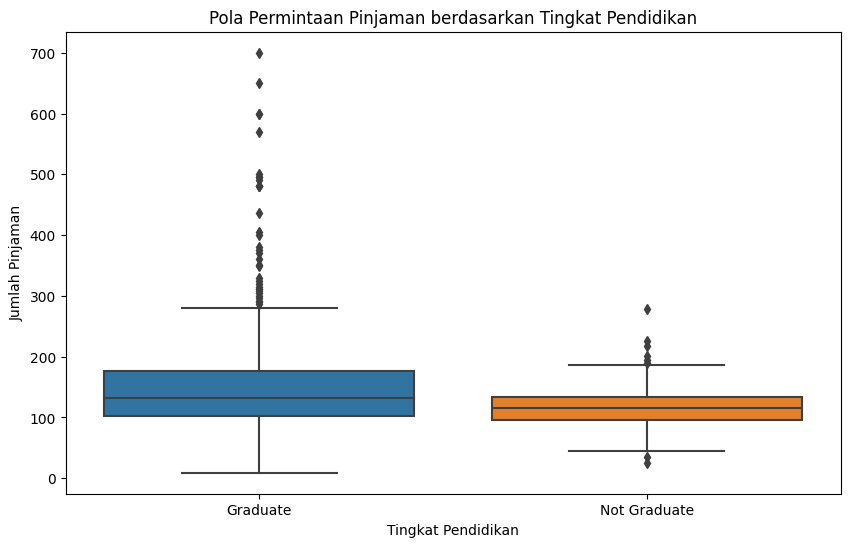

In [ ]:
# Identifikasi pola permintaan dan preferensi pelanggan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='LoanAmount', data=train)
plt.title('Pola Permintaan Pinjaman berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pinjaman')
plt.show()

dari visualisasi tersebut, dapat disimpulkan bahwa mayoritas yg mengajukan permohonan meiliki status graduate

> melihat distribusi pendapatan pemohon

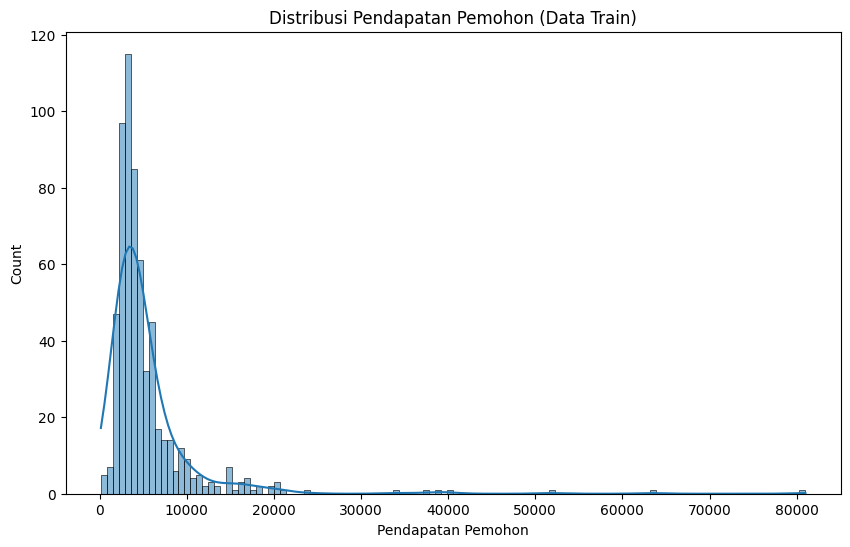

In [ ]:
# Visualisasi distribusi pendapatan pemohon dalam data train
plt.figure(figsize=(10, 6))
sns.histplot(train['ApplicantIncome'], kde=True)
plt.title('Distribusi Pendapatan Pemohon (Data Train)')
plt.xlabel('Pendapatan Pemohon')
plt.show()

dari visualisasi tersebut dapat disimpulkan bahwa distribusi datanya lebih condong ke kiri yg artinya rata2 pemohon memiliki pendapatan kurang dari 10.000

> melihat hubungan antara pemohon dan jumlah pinjaman

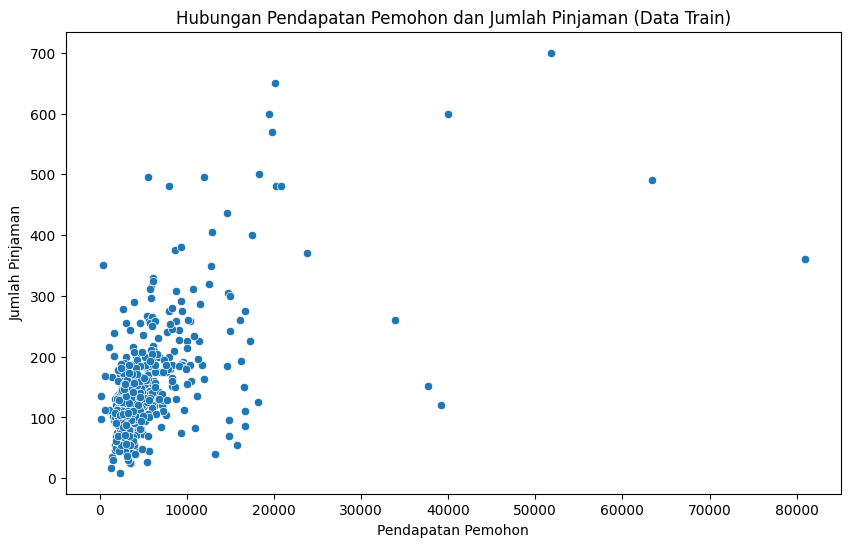

In [ ]:
# Hubungan antara pendapatan pemohon dan jumlah pinjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train)
plt.title('Hubungan Pendapatan Pemohon dan Jumlah Pinjaman (Data Train)')
plt.xlabel('Pendapatan Pemohon')
plt.ylabel('Jumlah Pinjaman')
plt.show()

berdasarkan visualisasi diatas, dapat disimpulkan bahwa banyaknya peminjam dengan pendapatan 0-10.000 dan memiliki jumlah pinjaman berkisar 0-300

In [ ]:
# Melakukan segmentasi berdasarkan ApplicantIncome dan LoanAmount
low_income_small_loan = train[(train['ApplicantIncome'] <= 3000) & (train['LoanAmount'] <= 100000)]
low_income_large_loan = train[(train['ApplicantIncome'] <= 3000) & (train['LoanAmount'] > 100000)]
high_income_small_loan = train[(train['ApplicantIncome'] > 3000) & (train['LoanAmount'] <= 100000)]
high_income_large_loan = train[(train['ApplicantIncome'] > 3000) & (train['LoanAmount'] > 100000)]

In [ ]:
#memisahkan data berdasarkan status loan
loan_accepted = train[train['Loan_Status'] == 'Y'].iloc[:, 1:-1]
loan_rejected = train[train['Loan_Status'] == 'N'].iloc[:, 1:-1]
loan_accepted

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban


In [ ]:
# Menghitung jumlah kemunculan dan proporsi untuk kolom yg bertipe data objek
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for column in categorical_columns:
    count_accepted = loan_accepted[column].value_counts()
    count_rejected = loan_rejected[column].value_counts()
    
    proportion_accepted = loan_accepted[column].value_counts(normalize=True)
    proportion_rejected = loan_rejected[column].value_counts(normalize=True)
    
    print("Count (Loan Accepted):\n", count_accepted)
    print("Count (Loan Rejected):\n", count_rejected)
    print("Proportion (Loan Accepted):\n", proportion_accepted)
    print("Proportion (Loan Rejected):\n", proportion_rejected)
    print("------------------------------")

Count (Loan Accepted):
 Male      339
Female     75
Name: Gender, dtype: int64
Count (Loan Rejected):
 Male      150
Female     37
Name: Gender, dtype: int64
Proportion (Loan Accepted):
 Male      0.818841
Female    0.181159
Name: Gender, dtype: float64
Proportion (Loan Rejected):
 Male      0.802139
Female    0.197861
Name: Gender, dtype: float64
------------------------------
Count (Loan Accepted):
 Yes    285
No     134
Name: Married, dtype: int64
Count (Loan Rejected):
 Yes    113
No      79
Name: Married, dtype: int64
Proportion (Loan Accepted):
 Yes    0.680191
No     0.319809
Name: Married, dtype: float64
Proportion (Loan Rejected):
 Yes    0.588542
No     0.411458
Name: Married, dtype: float64
------------------------------
Count (Loan Accepted):
 0     238
2      76
1      66
3+     33
Name: Dependents, dtype: int64
Count (Loan Rejected):
 0     107
1      36
2      25
3+     18
Name: Dependents, dtype: int64
Proportion (Loan Accepted):
 0     0.576271
2     0.184019
1     0.1

Pada kolom Gender:

Proporsi penerimaan pinjaman lebih tinggi untuk pemohon laki-laki (0,818) dibandingkan dengan pemohon perempuan (0,181).
Proporsi penolakan pinjaman juga lebih tinggi untuk pemohon laki-laki (0,802) dibandingkan dengan pemohon perempuan (0,197).

Pada kolom Married:

Proporsi penerimaan pinjaman lebih tinggi untuk mereka yang sudah menikah (0,680) dibandingkan dengan yang belum menikah (0,320).
Proporsi penolakan pinjaman lebih tinggi untuk mereka yang belum menikah (0,588) dibandingkan dengan yang sudah menikah (0,412).

Pada kolom Dependents:

Proporsi penerimaan pinjaman tertinggi untuk pemohon tanpa tanggungan (0,576), diikuti oleh pemohon dengan 2 tanggungan (0,184).
Proporsi penolakan pinjaman juga tertinggi untuk pemohon tanpa tanggungan (0,575), diikuti oleh pemohon dengan 1 tanggungan (0,194).

Pada kolom Education:

Proporsi penerimaan pinjaman lebih tinggi untuk pemohon yang berpendidikan tinggi (0,806) dibandingkan dengan yang tidak berpendidikan tinggi (0,194).
Proporsi penolakan pinjaman juga lebih tinggi untuk pemohon yang berpendidikan tinggi (0,729) dibandingkan dengan yang tidak berpendidikan tinggi (0,271).

Pada kolom Self_Employed:

Proporsi penerimaan pinjaman lebih tinggi untuk pemohon yang bukan pengusaha (0,860) dibandingkan dengan yang merupakan pengusaha (0,140).
Proporsi penolakan pinjaman juga lebih tinggi untuk pemohon yang bukan pengusaha (0,858) dibandingkan dengan yang merupakan pengusaha (0,142).

Pada kolom Property_Area:

Proporsi penerimaan pinjaman tertinggi untuk properti di daerah Semiurban (0,424), diikuti oleh daerah Urban (0,315) dan Rural (0,261).
Proporsi penolakan pinjaman tertinggi untuk properti di daerah Rural (0,359), diikuti oleh daerah Urban (0,359) dan Semiurban (0,281).

# 5 - Data Cleaning

In [ ]:
#melihat duplikasi data
train.duplicated().sum()

0

In [ ]:
#melihat duplikasi data
test.duplicated().sum()

0

In [ ]:
# deteksi missing value
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

pada kolom Gender, Married, Dependents, Self_employed, LoanAmount, Loan_Amount_Term, dan Credit_history terdapat missing value

In [ ]:
# deteksi missing value
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

pada kolom Gender, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, dan Credit_History, memiliki missing value

In [ ]:
# menghapus missing value
test.dropna(inplace=True)
train.dropna(inplace=True)

In [ ]:
#mengubah tipe data kolom Loan_Amount_Term menjadi int
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype(int)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype(int)

## 5.1 - Cardinality Check

In [ ]:
#melihat data kolom
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    int64  
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 52.5+ KB


In [ ]:
# memeriksa cardinality
print('Number of categories in the variable Gender     : {}'.format(len(train.Gender.unique())))
print('Number of categories in the variable Married     : {}'.format(len(train.Married.unique())))
print('Number of categories in the variable Dependents     : {}'.format(len(train.Dependents.unique())))
print('Number of categories in the variable Education     : {}'.format(len(train.Education.unique())))
print('Number of categories in the variable Self_Employed     : {}'.format(len(train.Self_Employed.unique())))
print('Number of categories in the variable Credit_History     : {}'.format(len(train.Credit_History.unique())))
print('Number of categories in the variable Property_Area     : {}'.format(len(train.Property_Area.unique())))
print('Number of categories in the variable Loan_Status     : {}'.format(len(train.Loan_Status.unique())))

Number of categories in the variable Gender     : 2
Number of categories in the variable Married     : 2
Number of categories in the variable Dependents     : 4
Number of categories in the variable Education     : 2
Number of categories in the variable Self_Employed     : 2
Number of categories in the variable Credit_History     : 2
Number of categories in the variable Property_Area     : 3
Number of categories in the variable Loan_Status     : 2


tidak ada kategori variabel yg melebihi 5, maka tidak ada yg perlu diubah

In [ ]:
#mengecek cardinality berdasarkan Gender
cardinality = train['Gender'].value_counts().reset_index()
cardinality.columns = ['Gender', 'count']
print(cardinality)

   Gender  count
0    Male    394
1  Female     86


terlihat mayoritas dari datanya adalah pria

In [ ]:
#mengecek cardinality berdasarkan Married
cardinality = train['Married'].value_counts().reset_index()
cardinality.columns = ['Married', 'count']
print(cardinality)

  Married  count
0     Yes    311
1      No    169


terliat mayoritas customer yg mengajukan pinjaman sudah menikah

In [ ]:
#mengecek cardinality berdasarkan Dependents
cardinality = train['Dependents'].value_counts().reset_index()
cardinality.columns = ['Dependents', 'count']
print(cardinality)

  Dependents  count
0          0    274
1          2     85
2          1     80
3         3+     41


terlihat customer banyak yg tidak memiliki tanggungan mengajukan pinjaman

In [ ]:
#mengecek cardinality berdasarkan Education
cardinality = train['Education'].value_counts().reset_index()
cardinality.columns = ['Education', 'count']
print(cardinality)

      Education  count
0      Graduate    383
1  Not Graduate     97


terlihat mayoritas customer yg mengajukan pinjaman memiliki status Graduate

In [ ]:
#mengecek cardinality berdasarkan Self_Employed
cardinality = train['Self_Employed'].value_counts().reset_index()
cardinality.columns = ['Self_Employed', 'count']
print(cardinality)

  Self_Employed  count
0            No    414
1           Yes     66


terlihat mayoritas customer yg mengajukan pinjaman memiliki status bukan pekerja mandiri

In [ ]:
#mengecek cardinality berdasarkan Credit_History
cardinality = train['Credit_History'].value_counts().reset_index()
cardinality.columns = ['Credit_History', 'count']
print(cardinality)

   Credit_History  count
0             1.0    410
1             0.0     70


terlihat mayoritas customer yg mengajukan pinjaman memiliki credit history

In [ ]:
#mengecek cardinality berdasarkan Property_Area
cardinality = train['Property_Area'].value_counts().reset_index()
cardinality.columns = ['Property_Area', 'count']
print(cardinality)

  Property_Area  count
0     Semiurban    191
1         Urban    150
2         Rural    139


terlihat tidak berbeda jauh antara area properti tetapi banyak area properti dari semiurban mengajukan pinjaman

In [ ]:
#mengecek cardinality berdasarkan Loan_Status
cardinality = train['Loan_Status'].value_counts().reset_index()
cardinality.columns = ['Loan_Status', 'count']
print(cardinality)

  Loan_Status  count
0           Y    332
1           N    148


terlihat mayoritas customer yg mengajukan pinjaman disetujui

## 5.2 - Handling Outlier

In [ ]:
#melihat data kolom
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    int64  
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 52.5+ KB


In [ ]:
def diagnostic_plots(train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=train[variable])
    plt.title('Boxplot')

    plt.show()

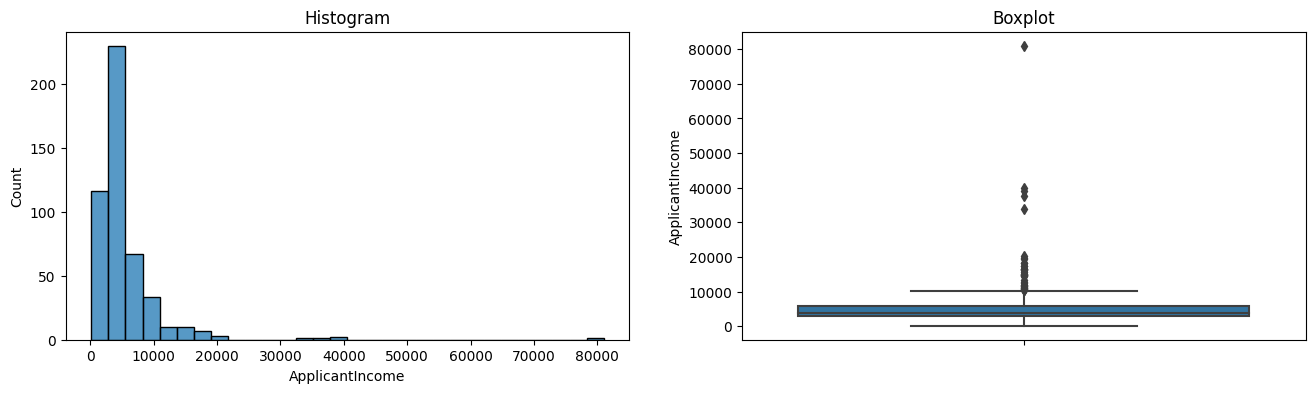


Skewness Value :  6.917026514199138


In [ ]:
#melihat distribusi data dan outlier kolom ApplicantIncome
diagnostic_plots(train, 'ApplicantIncome')
print('\nSkewness Value : ', train['ApplicantIncome'].skew())

dari visualisasi tersebut dapat disimpulkan, datanya lebih condong ke kiri yg bisa dikategorikan distribusi datanya skew dengan skewness value 6.91

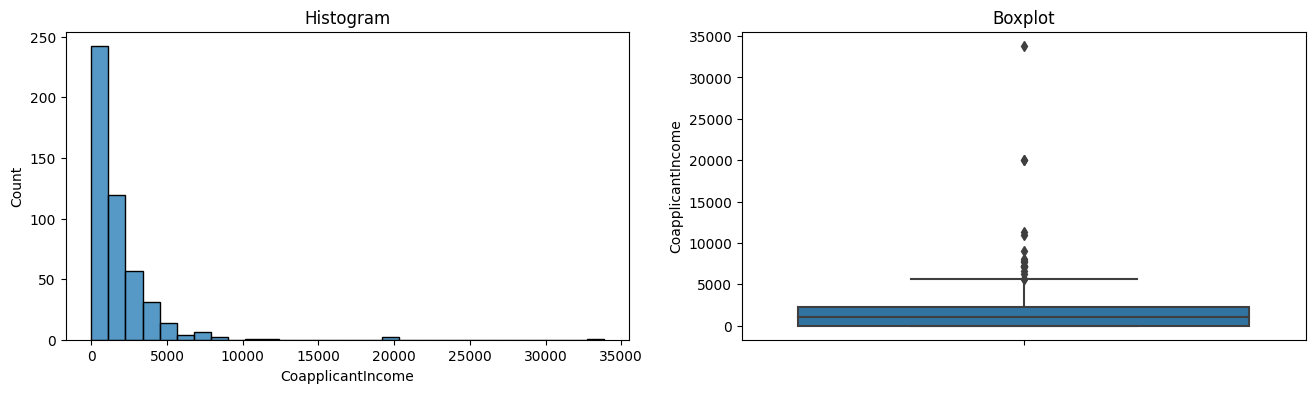


Skewness Value :  5.881622127841592


In [ ]:
#melihat distribusi data dan outlier kolom CoapplicantIncome
diagnostic_plots(train, 'CoapplicantIncome')
print('\nSkewness Value : ', train['CoapplicantIncome'].skew())

dari visualisasi tersebut dapat disimpulkan, datanya lebih condong ke kiri yg bisa dikategorikan distribusi datanya skew dengan skewness value 5.88

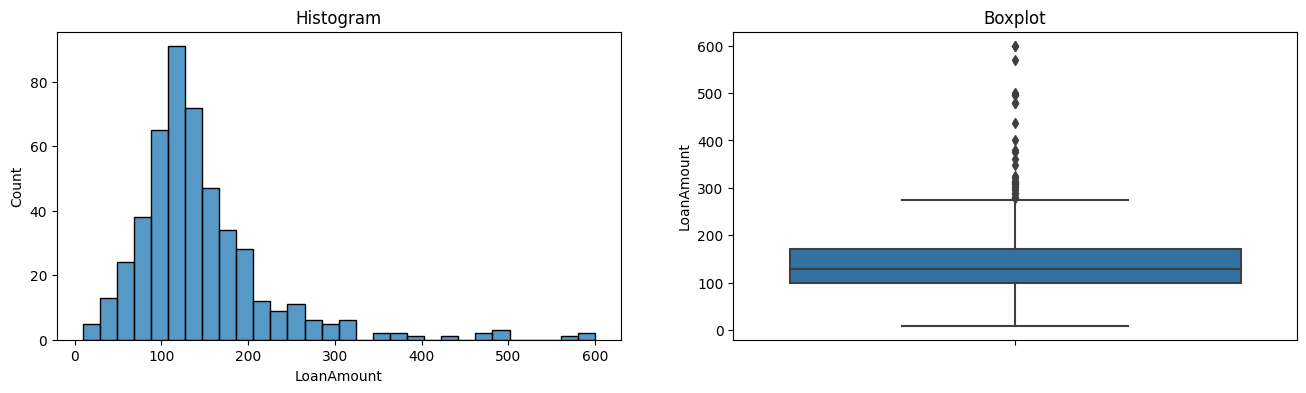


Skewness Value :  2.3614368477871213


In [ ]:
#melihat distribusi data dan outlier kolom LoanAmount
diagnostic_plots(train, 'LoanAmount')
print('\nSkewness Value : ', train['LoanAmount'].skew())

dari visualisasi diatas dapat disimpulkan distribusi datanya skew mendekati normal dengan skewness value 2.361

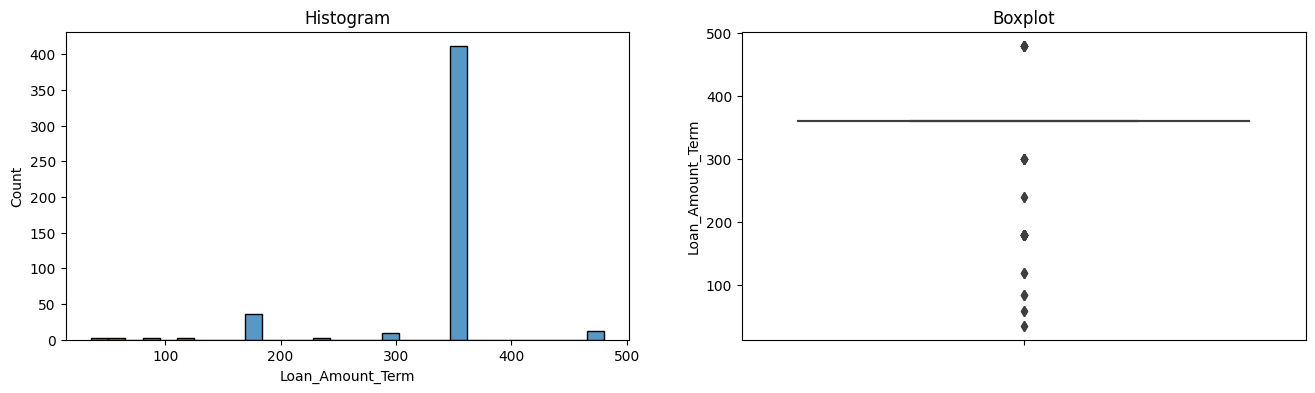


Skewness Value :  -2.333710422255636


In [ ]:
#melihat distribusi data dan outlier kolom Loan_Amount_Term
diagnostic_plots(train, 'Loan_Amount_Term')
print('\nSkewness Value : ', train['Loan_Amount_Term'].skew())

dari visualisasi tersebut dapat disimpulkan, distribusi datanya sangat skew dengan skweness value -2.33

### 5.2.1 - Outlier detection for skewed variables

In [ ]:
#mendeteksi outlier untuk distribusi skew
def find_skewed_boundaries(train, variable, distance):
    IQR = train[variable].quantile(0.75) - train[variable].quantile(0.25)

    lower_boundary = train[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = train[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
#mendeteksi outlier dari kolom ApplicantIncome
upper_boundary, lower_boundary = find_skewed_boundaries(train, 'ApplicantIncome', 3)
upper_boundary, lower_boundary

(14713.75, -5962.5)

In [ ]:
outlier = train[(train['ApplicantIncome'] <= lower_boundary) | (train['ApplicantIncome'] >= upper_boundary)]

print('percentage: ', len(outlier)/train.shape[0] * 100, '%')

percentage:  4.583333333333333 %


In [ ]:
#mendeteksi outlier dari kolom CoapplicantIncome
upper_boundary, lower_boundary = find_skewed_boundaries(train, 'CoapplicantIncome', 3)
upper_boundary, lower_boundary

(9013.0, -6759.75)

In [ ]:
outlier = train[(train['CoapplicantIncome'] <= lower_boundary) | (train['CoapplicantIncome'] >= upper_boundary)]

print('percentage: ', len(outlier)/train.shape[0] * 100, '%')

percentage:  1.0416666666666665 %


In [ ]:
#mendeteksi outlier dari kolom LoanAmount
upper_boundary, lower_boundary = find_skewed_boundaries(train, 'LoanAmount', 3)
upper_boundary, lower_boundary

(380.0, -110.0)

In [ ]:
outlier = train[(train['LoanAmount'] <= lower_boundary) | (train['LoanAmount'] >= upper_boundary)]

print('percentage: ', len(outlier)/train.shape[0] * 100, '%')

percentage:  2.2916666666666665 %


In [ ]:
#mendeteksi outlier dari kolom Loan_Amount_Term
upper_boundary, lower_boundary = find_skewed_boundaries(train, 'Loan_Amount_Term', 3)
upper_boundary, lower_boundary

(360.0, 360.0)

In [ ]:
outlier = train[(train['Loan_Amount_Term'] <= lower_boundary) | (train['Loan_Amount_Term'] >= upper_boundary)]

print('percentage: ', len(outlier)/train.shape[0] * 100, '%')

percentage:  100.0 %


### 5.2.2 - Handling Outlier for skewed variables using Capping

karena kolom Loan_Amount_Term dikategorikan sangat skew, maka akan menggunakan metode capping untuk menghandling outliernya

In [ ]:
#mendeteksi outlier dari kolom Loan_Amount_Term
lower_bound = 12
upper_bound = 360

train['Loan_Amount_Term'] = np.where(train['Loan_Amount_Term'] > upper_boundary, upper_boundary, train['Loan_Amount_Term'])
outlier_percentage = (len(train[train['Loan_Amount_Term'] < lower_boundary]) + len(train[train['Loan_Amount_Term'] > upper_boundary])) / len(train) * 100

print('Percentage of outliers after capping: ', outlier_percentage, '%')

Percentage of outliers after capping:  11.875 %


### 5.2.3 - Handling Outlier for skewed variables using winsorizing

 menggunakan Winsorizing untuk mempertahankan informasi yang terkandung dalam dataset dan mengurangi pengaruh outliers terhadap analisis

In [ ]:
#groupping data
outlier_train = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
outlier_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
5,5417,4196.0,267.0


In [ ]:
#menggunakan winsorizer
for col in outlier_train:
    winsorisertrain = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

winsorisertrain.fit(outlier_train)
outlierdf_train = winsorisertrain.transform(outlier_train)

In [ ]:
# Memeriksa batas minimum untuk setiap variabel
print('Left Tail Caps  : ', winsorisertrain.left_tail_caps_)

# Memeriksa batas maksimum untuk setiap variabel
print('Right Tail Caps : ', winsorisertrain.right_tail_caps_)

Left Tail Caps  :  {'ApplicantIncome': -1531.875, 'CoapplicantIncome': -3379.875, 'LoanAmount': -5.0}
Right Tail Caps :  {'ApplicantIncome': 10283.125, 'CoapplicantIncome': 5633.125, 'LoanAmount': 275.0}


ApplicantIncome - Before Capping


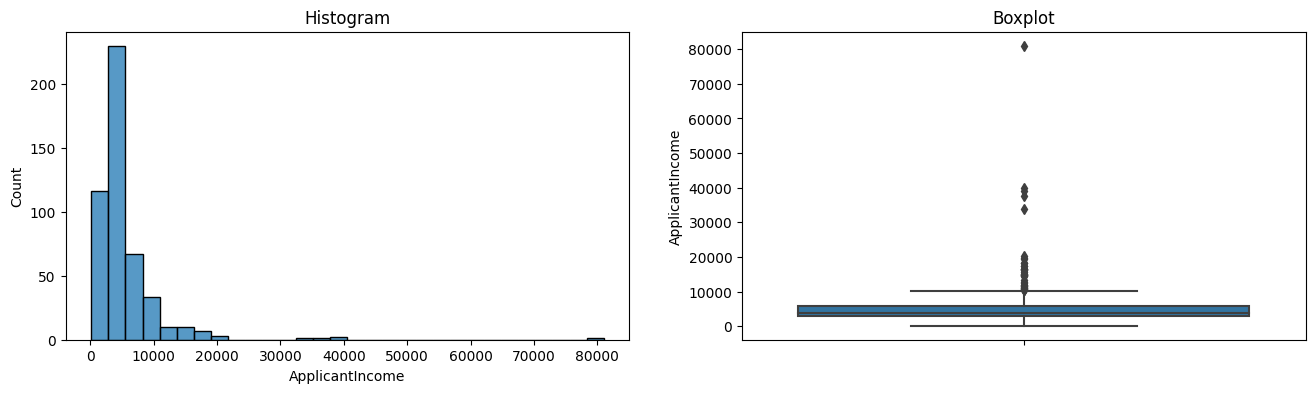


 ApplicantIncome - After Capping


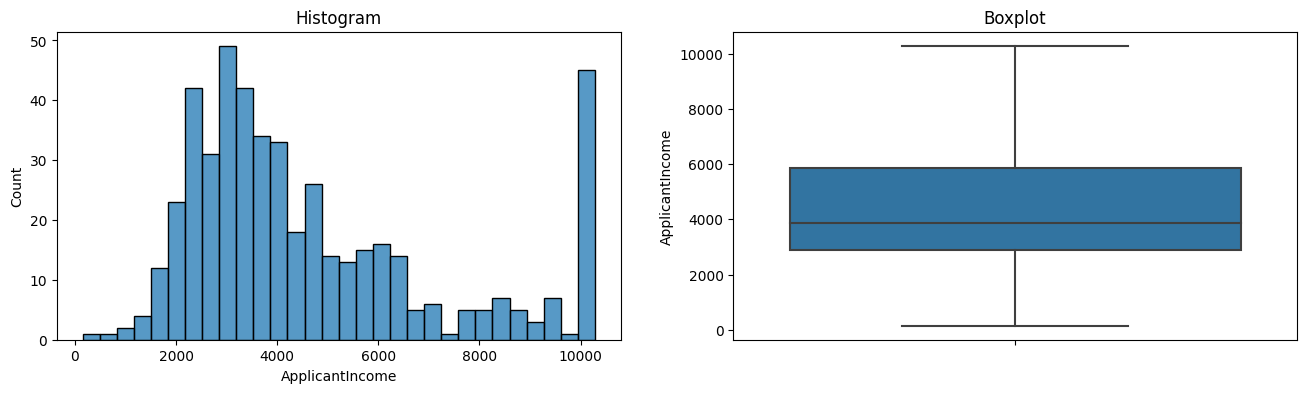

In [ ]:
# mencari outlier di kolom ApplicantIncome
print('ApplicantIncome - Before Capping')
diagnostic_plots(outlier_train, 'ApplicantIncome')
print('\n ApplicantIncome - After Capping')
diagnostic_plots(outlierdf_train, 'ApplicantIncome')

setelah dihandling outlier, terlihat sudah tidak ada lagi outlier di kolom ApplicantIncome

CoapplicantIncome - Before Capping


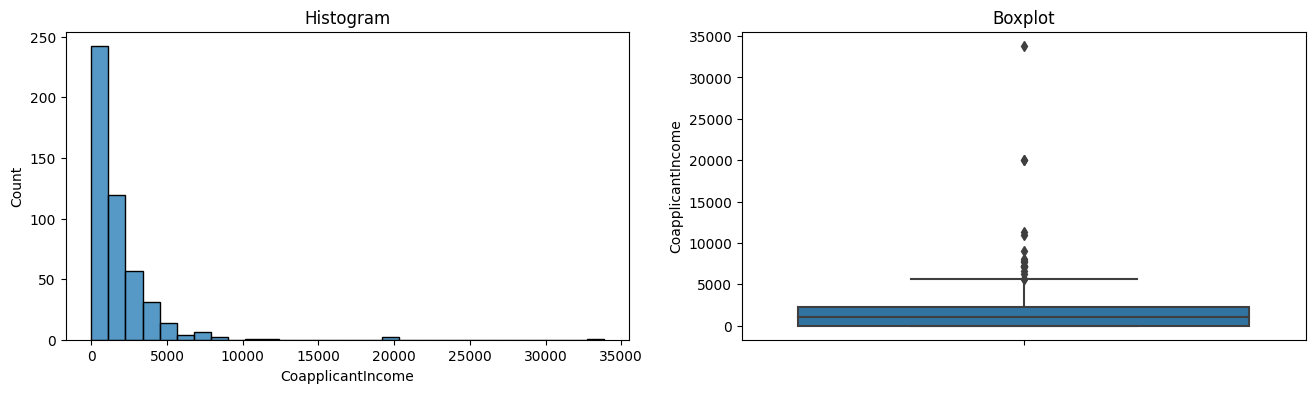


 CoapplicantIncome - After Capping


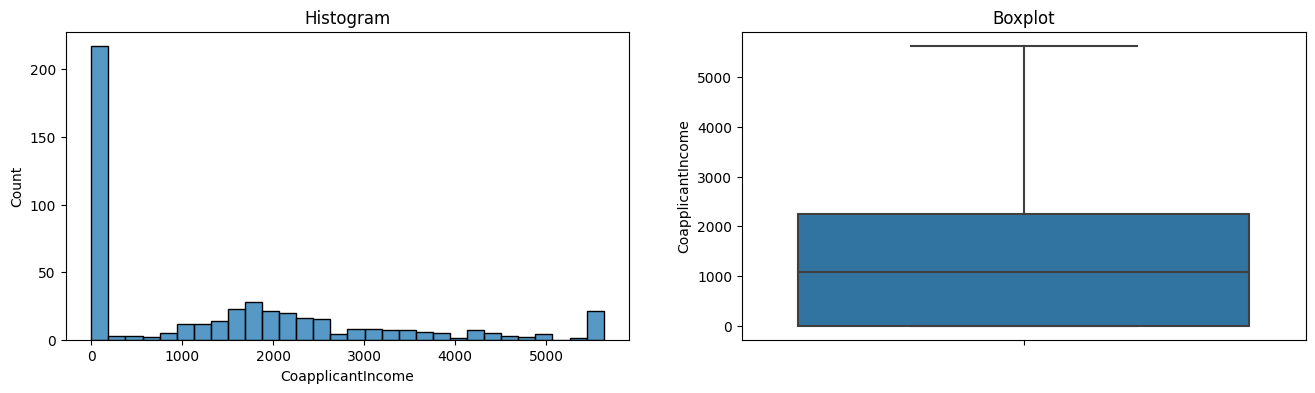

In [ ]:
# mencari outlier di kolom CoapplicantIncome
print('CoapplicantIncome - Before Capping')
diagnostic_plots(outlier_train, 'CoapplicantIncome')
print('\n CoapplicantIncome - After Capping')
diagnostic_plots(outlierdf_train, 'CoapplicantIncome')

setelah dihandling outlier, terlihat sudah tidak ada lagi outlier di kolom CoapplicantIncome

LoanAmount - Before Capping


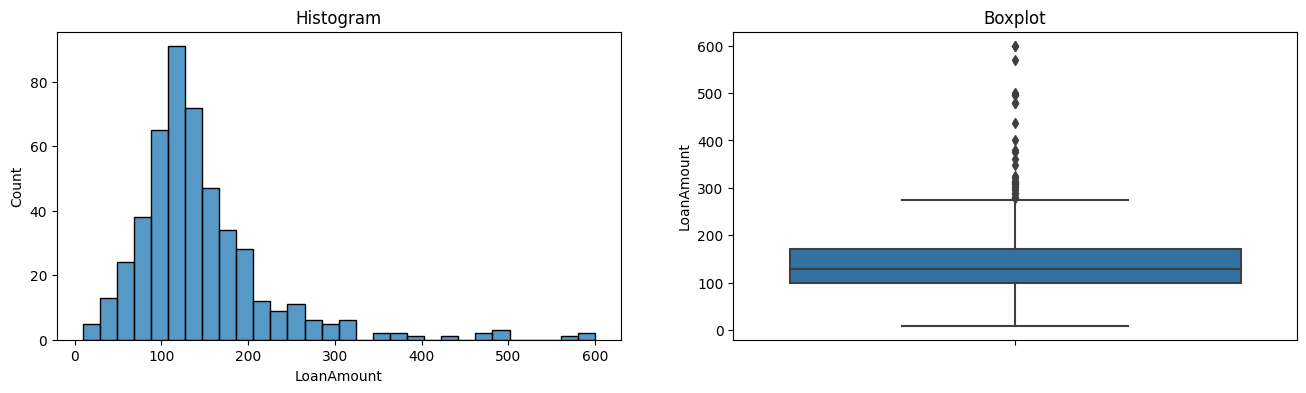


 LoanAmount - After Capping


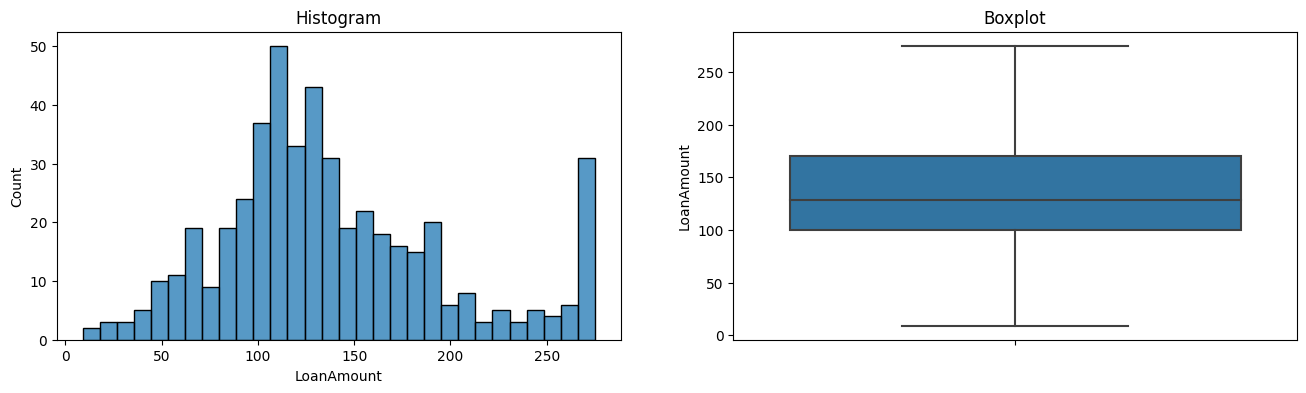

In [ ]:
# mencari outlier di kolom LoanAmount
print('LoanAmount - Before Capping')
diagnostic_plots(outlier_train, 'LoanAmount')
print('\n LoanAmount - After Capping')
diagnostic_plots(outlierdf_train, 'LoanAmount')

setelah dihandling outlier, terlihat sudah tidak ada lagi outlier di kolom LoanAmount

In [ ]:
# transformasi data train
train = winsorisertrain.fit_transform(train)

# 6 - Uji Statistik

In [ ]:
# Memisahkan data train berdasarkan Loan_Status
loan_accepted = train[train['Loan_Status'] == 'Y']
loan_rejected = train[train['Loan_Status'] == 'N']

In [ ]:
# mengelompokkan pemohonberdasarkan riwayat kredit yang baik (1) dan buruk (0)
accepted_credit_good = loan_accepted[loan_accepted['Credit_History'] == 1].shape[0]
accepted_credit_bad = loan_accepted[loan_accepted['Credit_History'] == 0].shape[0]
rejected_credit_good = loan_rejected[loan_rejected['Credit_History'] == 1].shape[0]
rejected_credit_bad = loan_rejected[loan_rejected['Credit_History'] == 0].shape[0]

In [ ]:
# Membuat contingency table untuk uji Chi-Square
contingency_table = pd.DataFrame([[accepted_credit_good, accepted_credit_bad],
                                 [rejected_credit_good, rejected_credit_bad]],
                                columns=['Good Credit', 'Bad Credit'],
                                index=['Loan Accepted', 'Loan Rejected'])

In [ ]:
# Melakukan uji Chi-Square
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-Square statistic =", chi2_statistic)
print("p-value =", p_value)

Contingency Table:
               Good Credit  Bad Credit
Loan Accepted          325           7
Loan Rejected           85          63

Chi-Square statistic = 131.29328312402072
p-value = 2.1359817668691315e-30


Berdasarkan hasil uji Chi-Square, Karena p-value yang sangat kecil dapat disimpulkan bahwa terdapat hubungan yg sigifikan antara kolom Credit_History dengan Loan_Status, maka untuk kolom Credit_History bisa dijadikan acuan untuk mengetahui karakteristik peminjam dapat diterima atau tidak

Hypotesis case :

H0: Loan Accepted <= Loan Rejected

H1 : Loan Accepted > Loan Rejected

In [ ]:
# membuat statistik inferential
alpha = 0.05
observed_chi2 = chi2_statistic
df = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_chi2 = stats.chi2.ppf(1 - alpha, df)

if observed_chi2 > critical_chi2:
    print("Tolak H0, terima H1: Jumlah pinjaman yang diterima (Loan Accepted) > Jumlah pinjaman yang ditolak (Loan Rejected)")
else:
    print("Gagal tolak H0: Jumlah pinjaman yang diterima (Loan Accepted) <= Jumlah pinjaman yang ditolak (Loan Rejected)")

Tolak H0, terima H1: Jumlah pinjaman yang diterima (Loan Accepted) > Jumlah pinjaman yang ditolak (Loan Rejected)


jumlah pinjaman yang diterima (Loan Accepted) secara statistik signifikan lebih besar daripada jumlah pinjaman yang ditolak (Loan Rejected).

# 7 - Overall Analysis

- Laki-laki memiliki proporsi penerimaan dan penolakan pinjaman yang lebih tinggi dibandingkan perempuan.

- Rata-rata pendapatan pemohon pria sedikit lebih tinggi daripada pemohon wanita.

- Daerah Semiurban memiliki jumlah pelanggan yang paling banyak, tetapi tidak ada perbedaan signifikan antara lokasi properti lainnya.

- Mayoritas pemohon memiliki status graduate.

- Rata - Rata Pendapatan pemohon cenderung rendah, dengan sebagian besar pemohon memiliki pendapatan di bawah 10.000.

- Banyak pemohon dengan pendapatan rendah (0-10.000) mengajukan pinjaman dengan jumlah yang relatif kecil (0-300).

## 7.1 - Saran Bisnis

- Penawaran Pinjaman Khusus untuk Pemohon Wanita:
Mengingat proporsi penerimaan pinjaman yang lebih rendah untuk pemohon perempuan, dapat mempertimbangkan untuk menawarkan program pinjaman khusus yang ditujukan untuk pemohon wanita. Program ini dapat mencakup suku bunga yang lebih kompetitif atau persyaratan pengajuan yang lebih fleksibel untuk menarik pemohon wanita.

- Fokus pada Daerah Semiurban:
Mengingat jumlah pelanggan tertinggi berada di daerah Semiurban, dapat mempertimbangkan untuk meningkatkan fokus bisnis di daerah tersebut. Hal ini dapat meliputi peningkatan pemasaran dan promosi yang ditargetkan khusus untuk daerah Semiurban.

- Penyediaan Pinjaman Mikro atau Kecil:
Dengan banyaknya pemohon dengan pendapatan rendah yang mengajukan pinjaman dengan jumlah yang relatif kecil, dapat mempertimbangkan untuk menyediakan program pinjaman mikro atau kecil. Ini dapat membantu pemohon dengan kebutuhan finansial mendesak dan memberikan mereka akses ke pinjaman yang lebih terjangkau.

In [ ]:
# save dataset yg sudah dicleaning
train.to_csv('cleaned_data_train.csv', index=False)
test.to_csv('cleaned_data_test.csv', index=False)

Link Dashboard : https://lookerstudio.google.com/reporting/61a07723-bdb8-4581-b1a2-70a40386d5d8